In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly

# 1. Business Understanding
Goal: Estimate GPA and highlight most influential factors affecting GPA. 

# 2. Data Understanding

## 2.1 Load dataset

In [ ]:
## Read *.xlsx file into pandas DataFrame
FILE_PATH = r"gpa.xlsx"
df = pd.read_excel(FILE_PATH)
df ## Display dataframe

,Department,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra,Semester,Overall,Last
0,Business Administration,Male,4.17,4.84,15000,Village,3,4.0,0,100,No,3,Yes,6th,3.907,3.220
1,Business Administration,Female,4.92,5.00,39000,City,3,1.0,240,80,No,3,Yes,7th,2.415,3.467
2,Business Administration,Male,5.00,4.83,29000,Village,3,0.0,270,90,No,4,Yes,3rd,2.179,4.000
3,Business Administration,Male,4.00,4.50,100000,City,5,4.5,180,100,No,5,Yes,4th,2.908,3.800
4,Business Administration,Female,2.19,3.17,24000,Village,3,0.0,180,100,No,3,Yes,4th,2.469,3.940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Public Health,Male,3.50,4.00,30000,Village,2,6.0,120,50,Yes,2,Yes,7th,3.622,3.250
489,Public Health,Male,4.50,4.00,43000,City,4,3.0,120,70,No,3,Yes,9th,3.656,3.500
490,Sociology,Female,4.56,3.67,21000,City,3,0.0,180,50,No,2,No,2nd,3.451,3.560
491,Sociology,Male,4.23,4.50,13000,Village,3,3.0,150,80,No,3,Yes,10th,3.154,3.610


| Columns     | Description                                                                              |
|-------------|------------------------------------------------------------------------------------------|
| Department  | The academic department the student is enrolled in (e.g.,   Computer Science, Business). |
| Gender      | The gender of the student.                                                               |
| HSC         | Score obtained in higher secondary education.                                            |
| SSC         | Score obtained in secondary school education.                                            |
| Income      | Monthly family income of their parents.                                                  |
| Hometown    | The type of area where the student resides (e.g., urban, rural).                         |
| Computer    | Proficiency level in computer usage (1 to 5, 5 most proficient).                                                     |
| Preparation | Time spent on study preparation outside class hours (in hours).                                     |
| Gaming      | Time spent on gaming activities daily (in minutes).                                                   |
| Attendance  | Regularity in class participation (%).                                                       |
| Job         | Indicates if the student has a part-time job.                                            |
| English     | Proficiency in English communication skills.                                             |
| Extra       | Participation in extracurricular activities.                                             |
| Semester    | Current semester the student is enrolled in.                                             |
| Overall     | Cumulative Grade Point Average (cGPA).                                                   |
| Last        | Performance in the last semester.                                                        |

This dataset was modelled after https://data.mendeley.com/datasets/5b82ytz489/1

## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column
df.info() ## Alternatively: df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Department   493 non-null    object 
 1   Gender       493 non-null    object 
 2   HSC          493 non-null    float64
 3   SSC          493 non-null    float64
 4   Income       493 non-null    int64  
 5   Hometown     493 non-null    object 
 6   Computer     493 non-null    int64  
 7   Preparation  493 non-null    float64
 8   Gaming       493 non-null    int64  
 9   Attendance   493 non-null    int64  
 10  Job          493 non-null    object 
 11  English      493 non-null    int64  
 12  Extra        493 non-null    object 
 13  Semester     493 non-null    object 
 14  Overall      493 non-null    float64
 15  Last         493 non-null    float64
dtypes: float64(5), int64(5), object(6)
memory usage: 61.8+ KB


In [4]:
## Check for missing data
df.isna().sum() ## Alternative: df.isnull().sum()

Department     0
Gender         0
HSC            0
SSC            0
Income         0
Hometown       0
Computer       0
Preparation    0
Gaming         0
Attendance     0
Job            0
English        0
Extra          0
Semester       0
Overall        0
Last           0
dtype: int64

In [5]:
## Describe data distribution
df.describe(include="all")

,Department,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra,Semester,Overall,Last
count,493,493,493.000000,493.000000,493.000000,493,493.000000,493.000000,493.000000,493.000000,493,493.000000,493,493,493.000000,493.000000
unique,10,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,2,11,NaN,NaN
top,Computer Science and Engineering,Male,NaN,NaN,NaN,Village,NaN,NaN,NaN,NaN,No,NaN,No,2nd,NaN,NaN
freq,443,328,NaN,NaN,NaN,280,NaN,NaN,NaN,NaN,459,NaN,288,183,NaN,NaN
mean,NaN,NaN,4.156775,4.767647,39434.077079,NaN,3.338742,1.792089,192.474645,71.196755,NaN,3.569980,NaN,NaN,2.996428,3.163888
std,NaN,NaN,0.546504,0.349538,25896.569895,NaN,1.252988,1.387692,61.113997,18.902505,NaN,0.870515,NaN,NaN,0.492391,0.641475
min,NaN,NaN,2.170000,3.000000,10000.000000,NaN,1.000000,0.000000,0.000000,10.000000,NaN,1.000000,NaN,NaN,1.683000,1.000000
25%,NaN,NaN,3.830000,4.680000,20000.000000,NaN,3.000000,0.500000,150.000000,60.000000,NaN,3.000000,NaN,NaN,2.635000,2.810000
50%,NaN,NaN,4.170000,4.940000,30000.000000,NaN,3.000000,2.000000,210.000000,70.000000,NaN,4.000000,NaN,NaN,2.964000,3.250000
75%,NaN,NaN,4.500000,5.000000,50000.000000,NaN,4.000000,3.000000,240.000000,90.000000,NaN,4.000000,NaN,NaN,3.356000,3.670000


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

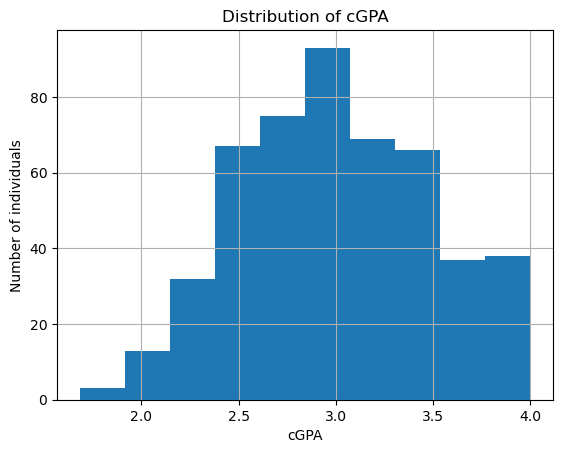

In [6]:
## Understanding distribution of target
col_y = 'Overall'

## Plot histogram
df[col_y].hist()
plt.title(f"Distribution of cGPA")
plt.suptitle('')  # Remove default title by Pandas
plt.xlabel("cGPA")
plt.ylabel("Number of individuals")
plt.show()

### 2.3.1.2 Understanding distribution of features

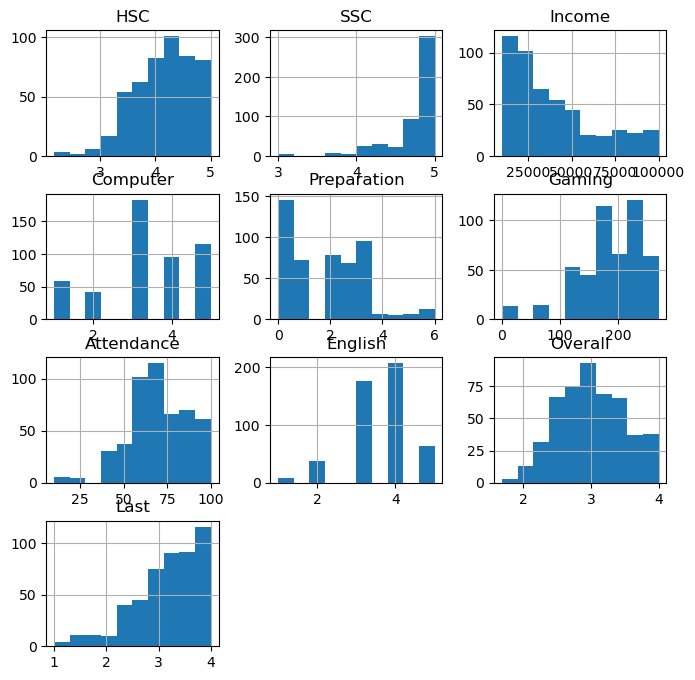

In [7]:
## Plot histogram
df.hist(figsize=(8,8))
plt.show()

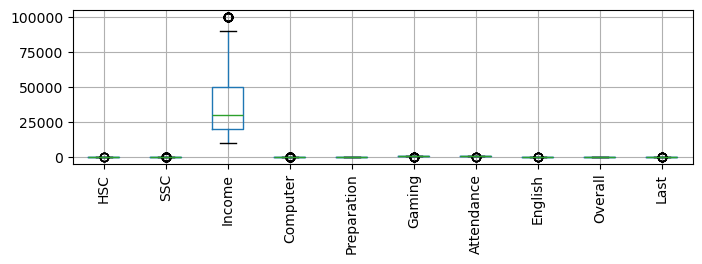

In [8]:
## Plot boxplot for different features
df.boxplot(rot=90, figsize=(8, 2)) ## rot: rotation of label
plt.show()

### 2.3.2 Understanding relationship between variables

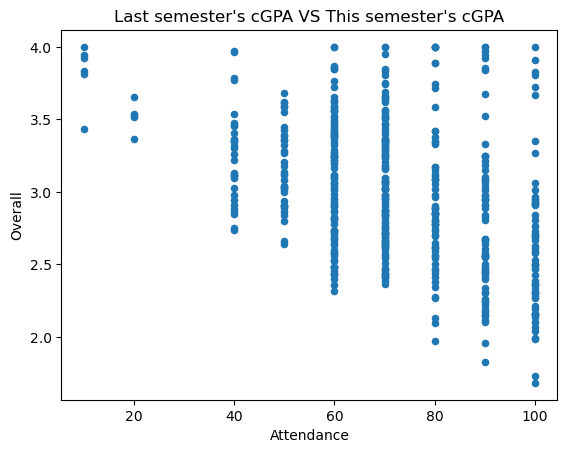

In [9]:
## Plot scatterplot
col_x = 'Attendance'
col_y = 'Overall'

df.plot(x=col_x,
        y=col_y,
        kind='scatter')
plt.title(f"Last semester's cGPA VS This semester's cGPA")
plt.suptitle('')  # Remove default title by Pandas
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.show()

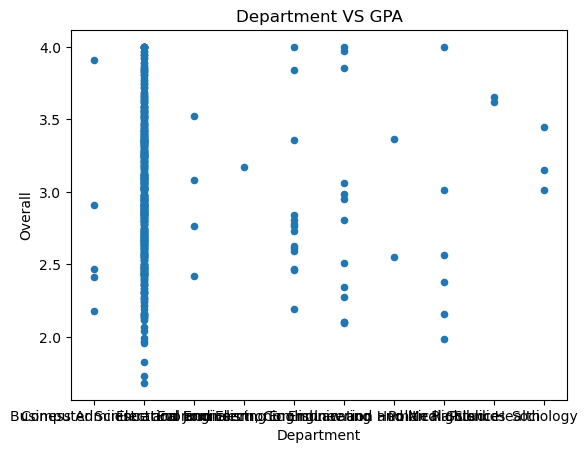

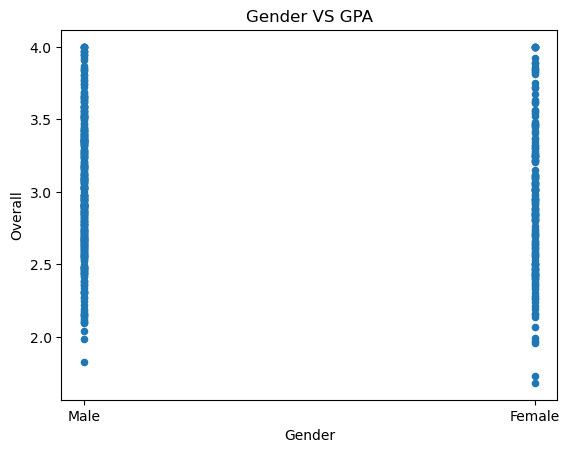

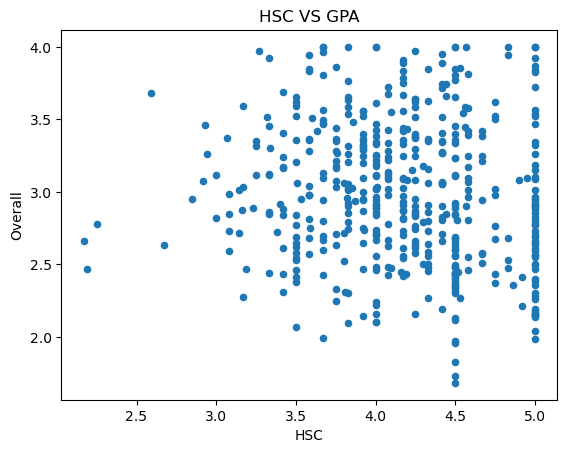

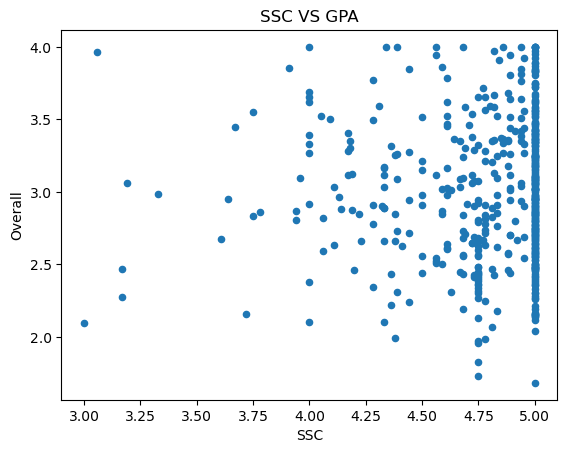

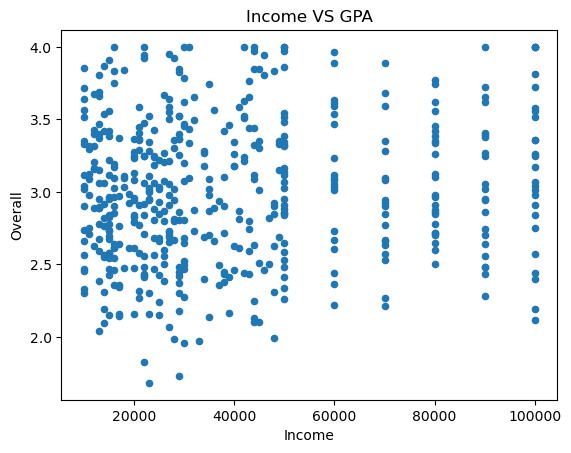

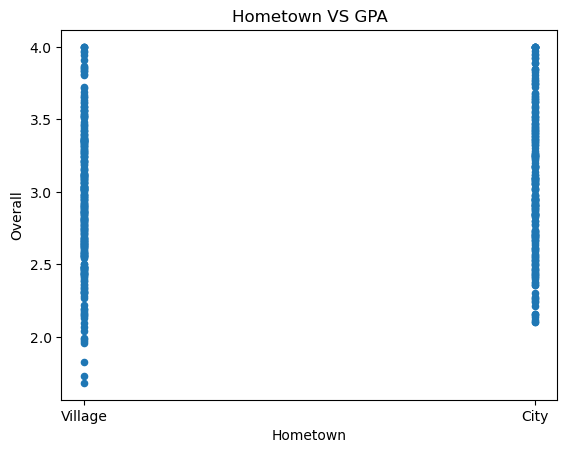

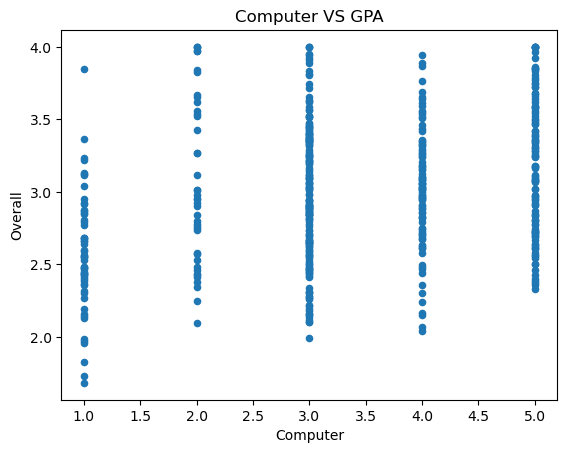

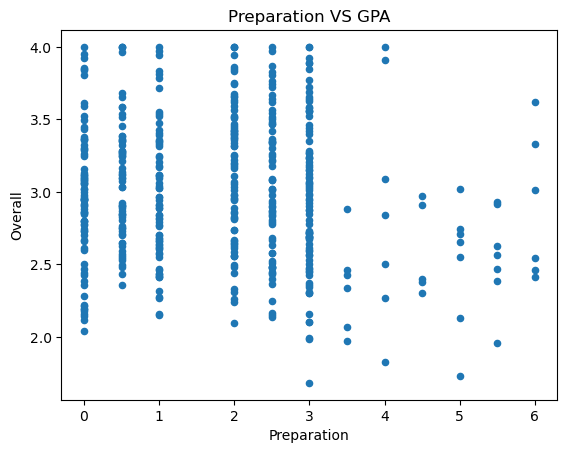

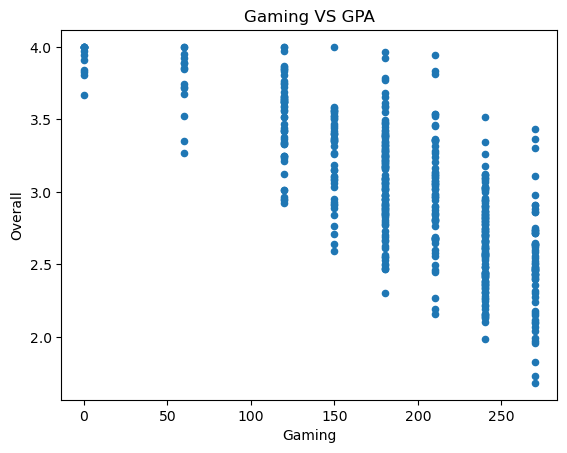

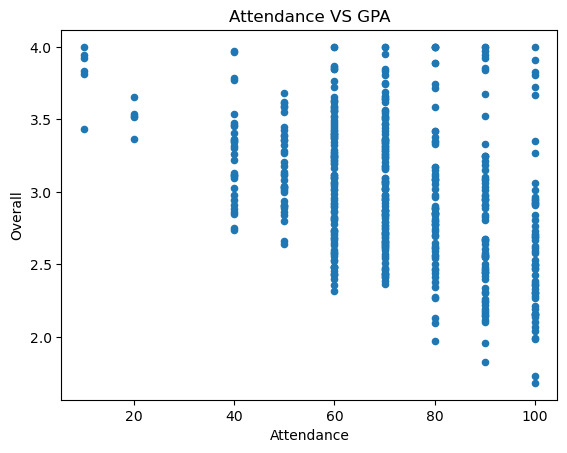

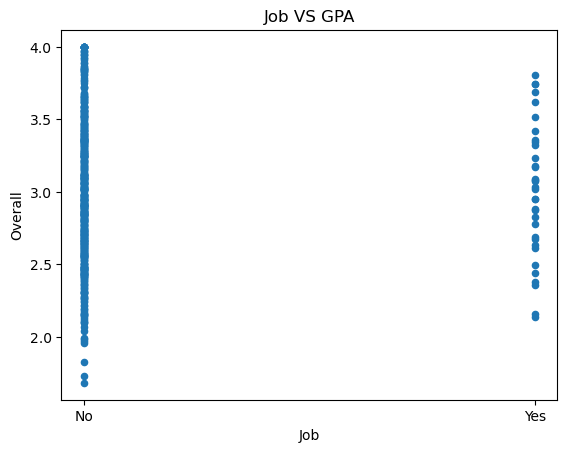

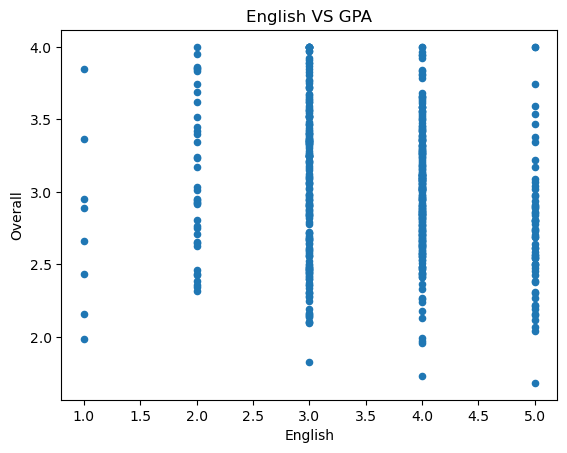

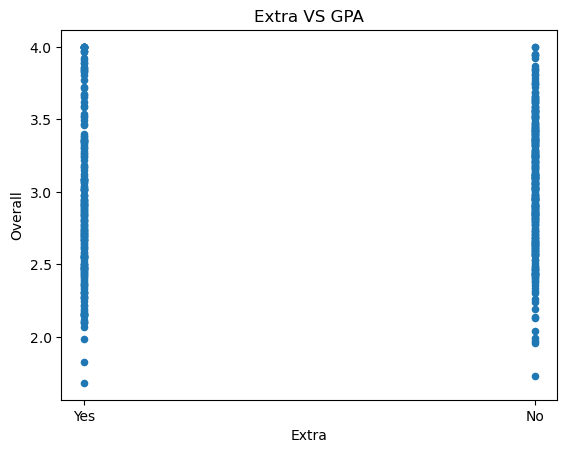

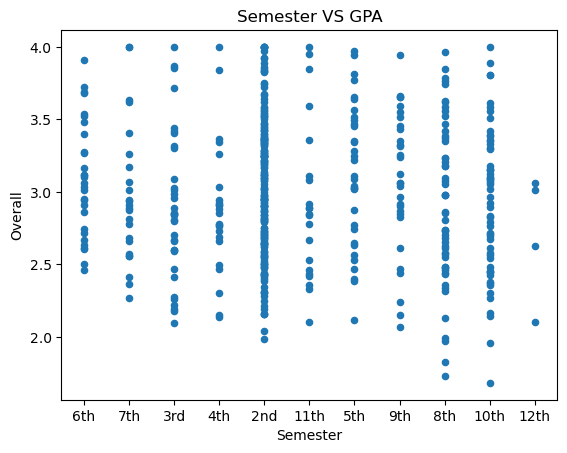

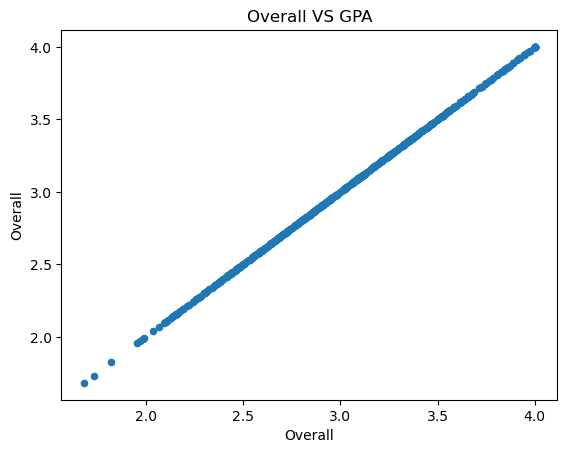

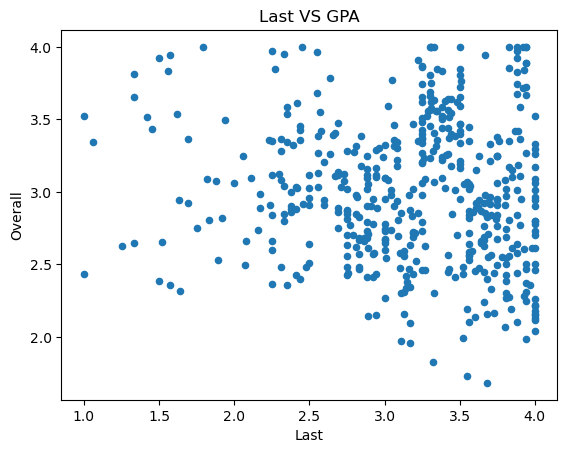

In [11]:
for col_x in df.columns:
    df.plot(x=col_x,
            y=col_y,
            kind='scatter')
    plt.title(f"{col_x} VS GPA")
    plt.suptitle('')  # Remove default title by Pandas
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.show()

In [ ]:
## Check datatypes for each column
col_numeric = df.select_dtypes(include=['float', 'int']).columns ## Select all categorical columns

## Display correlation matrix
df_corr = df[col_numeric].corr()
df_corr

,HSC,SSC,Income,Computer,Preparation,Gaming,Attendance,English,Overall,Last
HSC,1.000000,0.365539,-0.047505,-0.062396,0.105688,-0.126918,0.307074,-0.050387,-0.099437,0.243873
SSC,0.365539,1.000000,0.031762,0.008274,-0.010271,-0.094475,0.080594,0.088449,0.029473,0.108512
Income,-0.047505,0.031762,1.000000,0.106456,-0.051836,-0.020496,-0.102459,0.055090,0.103771,0.003122
Computer,-0.062396,0.008274,0.106456,1.000000,0.003181,-0.005926,-0.003420,0.156180,0.301770,0.180024
Preparation,0.105688,-0.010271,-0.051836,0.003181,1.000000,-0.075766,0.311700,-0.082574,-0.108866,0.339781
Gaming,-0.126918,-0.094475,-0.020496,-0.005926,-0.075766,1.000000,-0.201386,0.251182,-0.749650,-0.270765
Attendance,0.307074,0.080594,-0.102459,-0.003420,0.311700,-0.201386,1.000000,-0.066243,-0.411175,0.648784
English,-0.050387,0.088449,0.055090,0.156180,-0.082574,0.251182,-0.066243,1.000000,-0.142039,0.043559
Overall,-0.099437,0.029473,0.103771,0.301770,-0.108866,-0.749650,-0.411175,-0.142039,1.000000,-0.095494
Last,0.243873,0.108512,0.003122,0.180024,0.339781,-0.270765,0.648784,0.043559,-0.095494,1.000000


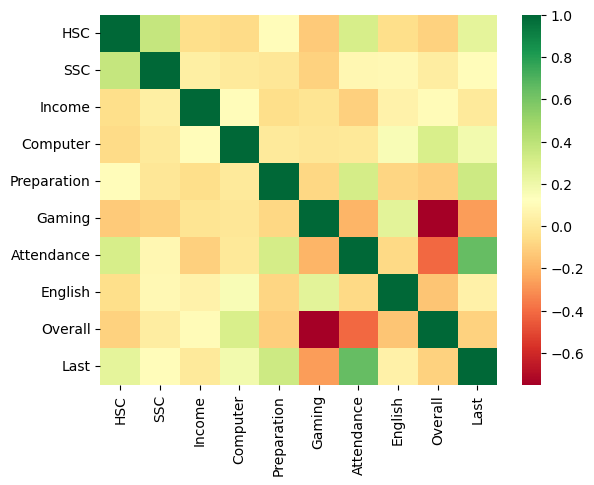

In [ ]:
## Plot heatmap
sns.heatmap(df_corr, cmap='RdYlGn')
plt.show()

In [ ]:
# ## Plot pairplot
# sns.pairplot(df, hue=col_y)
# plt.show()

### 🤓 Back to slides 👨🏻‍🏫

# 3. Data Preparation

## 3.1 Data Cleaning

| Columns     | Description                                                                              |
|-------------|------------------------------------------------------------------------------------------|
| Department  | The academic department the student is enrolled in (e.g.,   Computer Science, Business). |
| Gender      | The gender of the student.                                                               |
| HSC         | Score obtained in higher secondary education.                                            |
| SSC         | Score obtained in secondary school education.                                            |
| Income      | Monthly family income of their parents.                                                  |
| Hometown    | The type of area where the student resides (e.g., urban, rural).                         |
| Computer    | Proficiency level in computer usage (1 to 5, 5 most proficient).                                                     |
| Preparation | Time spent on study preparation outside class hours (in hours).                                     |
| Gaming      | Time spent on gaming activities daily (in minutes).                                                   |
| Attendance  | Regularity in class participation (%).                                                       |
| Job         | Indicates if the student has a part-time job.                                            |
| English     | Proficiency in English communication skills.                                             |
| Extra       | Participation in extracurricular activities.                                             |
| Semester    | Current semester the student is enrolled in.                                             |
| Overall     | Cumulative Grade Point Average (cGPA).                                                   |
| Last        | Performance in the last semester.                                                        |

## 3.2 Handling Categorical Data (One-Hot Encoding)

In [ ]:
## Check datatypes for each column
df.dtypes

Department      object
Gender          object
HSC            float64
SSC            float64
Income           int64
Hometown        object
Computer         int64
Preparation    float64
Gaming           int64
Attendance       int64
Job             object
English          int64
Extra           object
Semester        object
Overall        float64
Last           float64
dtype: object

In [ ]:
## Check datatypes for each column
col_categorical = df.select_dtypes(include=['object']).columns ## Select all categorical columns

## Print data about categorical column
'''
nunique(): Return total number of unique values in column
unique(): Return unique values in column
'''
for col in df[col_categorical]:
    print(f'{col} ({df[col].nunique()}): {df[col].unique()}') 

Department (10): ['Business Administration' 'Computer Science and Engineering' 'Economics'
 'Electrical and Electronic Engineering' 'English'
 'Journalism, Communication and Media Studies' 'Law and Human Rights'
 'Political Science' 'Public Health' 'Sociology']
Gender (2): ['Male' 'Female']
Hometown (2): ['Village' 'City']
Job (2): ['No' 'Yes']
Extra (2): ['Yes' 'No']
Semester (11): ['6th' '7th' '3rd' '4th' '2nd' '11th' '5th' '9th' '8th' '10th' '12th']


In [ ]:
## Split data into features (X) and target (y)
y = df[col_y] ## Select target column 

col_irrelevant = [col_y, 'Department', 'Semester']

X = df.drop(col_irrelevant, axis=1) ## Select feature columns 

## One-Hot Encoding
X = pd.get_dummies(X, 
               drop_first=True ## Remove redundant information
               )
X

,HSC,SSC,Income,Computer,Preparation,Gaming,Attendance,English,Last,Gender_Male,Hometown_Village,Job_Yes,Extra_Yes
0,4.17,4.84,15000,3,4.0,0,100,3,3.220,True,True,False,True
1,4.92,5.00,39000,3,1.0,240,80,3,3.467,False,False,False,True
2,5.00,4.83,29000,3,0.0,270,90,4,4.000,True,True,False,True
3,4.00,4.50,100000,5,4.5,180,100,5,3.800,True,False,False,True
4,2.19,3.17,24000,3,0.0,180,100,3,3.940,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,3.50,4.00,30000,2,6.0,120,50,2,3.250,True,True,True,True
489,4.50,4.00,43000,4,3.0,120,70,3,3.500,True,False,False,True
490,4.56,3.67,21000,3,0.0,180,50,2,3.560,False,False,False,False
491,4.23,4.50,13000,3,3.0,150,80,3,3.610,True,True,False,True


### Side Quest: Curse of Dimensionality

In [ ]:
## Sample data
num_sample = 20
df_cod = df
df_cod_sample = df_cod.sample(num_sample, random_state=2025)
df_cod_sample

,Department,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra,Semester,Overall,Last
48,Computer Science and Engineering,Male,3.75,5.00,20000,City,3,0.5,210,40,No,3,No,2nd,3.362,2.31
411,Computer Science and Engineering,Female,4.08,5.00,12000,City,5,2.0,60,90,No,3,Yes,2nd,3.675,3.88
318,Computer Science and Engineering,Male,4.17,4.59,41000,Village,3,2.5,240,60,No,4,No,2nd,2.867,3.56
416,Computer Science and Engineering,Male,5.00,5.00,28000,City,5,3.0,60,90,No,3,Yes,2nd,3.921,3.88
362,Computer Science and Engineering,Male,5.00,5.00,14000,Village,3,3.0,240,80,No,3,No,2nd,2.562,3.71
314,Computer Science and Engineering,Female,4.17,5.00,47000,Village,4,2.0,240,70,No,3,Yes,2nd,2.818,3.56
83,Computer Science and Engineering,Male,4.33,5.00,12000,Village,4,0.0,180,70,No,4,No,10th,3.156,2.88
30,Computer Science and Engineering,Male,4.00,4.78,10000,Village,3,2.0,270,60,No,4,Yes,8th,2.737,2.16
468,"Journalism, Communication and Media Studies",Female,4.67,4.56,45000,City,3,2.5,270,70,No,4,No,2nd,2.510,2.50
34,Computer Science and Engineering,Male,3.82,5.00,20000,City,4,2.0,240,60,No,4,No,3rd,2.955,2.50


In [ ]:
## Visualize only 2 features
df_cod_sample['dummy_feature'] = 1
col_cod_X = 'Attendance'
col_cod_y = col_y
col_cod_z = 'dummy_feature'

import plotly.express as px
fig = px.scatter_3d(df_cod_sample, 
                    x=col_cod_X, 
                    y=col_cod_y, 
                    z=col_cod_z,
                    size=col_cod_z)
fig.show()

In [ ]:
## Visualize one more additional features (i.e., 3 features)
col_cod_X = 'Attendance'
col_cod_y = col_y
col_cod_z = 'Gaming'

fig = px.scatter_3d(df_cod_sample, 
                    x=col_cod_X, 
                    y=col_cod_y, 
                    z=col_cod_z,
                    size=col_cod_z)
fig.show()

## Notice how spread out the data is
## Some parts of the graph are lacking in data, since # dimensions increased but # rows did not change


In [ ]:
## Visualize whole dataset based on 3 features
col_cod_X = 'Attendance'
col_cod_y = col_y
col_cod_z = 'Gaming'

fig = px.scatter_3d(df, 
                    x=col_cod_X, 
                    y=col_cod_y, 
                    z=col_cod_z,
                    size=col_cod_z)
fig.show()

## Notice how the distribution / spread of data has changed

## 3.3 Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

## Split data into train set and test set
test_size = 0.3 
random_state = 2025 ## For reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=test_size, 
                                                    random_state=random_state)

### 🤓 Back to slides 👨🏻‍🏫

# 4. Modelling

### 4.2 Train Model

In [ ]:
from sklearn.linear_model import LinearRegression
## Initialise model
linr = LinearRegression(fit_intercept=True) ## Linear Regression model
linr.fit(X_train, y_train) ## Train model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 🤓 Back to slides 👨🏻‍🏫

# 5. Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

## Evaluate model
y_pred_linr = linr.predict(X_test) ## Prediction using model 1

## Calculate error
E = y_pred_linr - y_test
E

48    -0.050129
411    0.155187
318   -0.069586
416   -0.102129
362   -0.070553
         ...   
481   -0.120376
155   -0.140692
24     0.033869
370    0.025271
440    0.005267
Name: Overall, Length: 148, dtype: float64

In [ ]:
## Calculate mean absolute error
AE = np.abs(E)

MAE = np.mean(AE)
MAE

np.float64(0.0614485982552848)

In [ ]:
## Calculate mean squared error
SE = E**2

MSE = np.mean(SE)
MSE

np.float64(0.006143641331017716)

In [ ]:
## Calculate root mean squared error
SE = E**2
SE

MSE = np.mean(SE)
MSE

RMSE = np.sqrt(MSE)
RMSE

np.float64(0.0783813838294382)

In [ ]:
print("Linear Regression MAE: ", mean_absolute_error(y_test, y_pred_linr)) ## Calculate MSE of model 1
print("Linear Regression MSE: ", mean_squared_error(y_test, y_pred_linr)) ## Calculate MSE of model 1
print("Linear Regression RMSE: ", root_mean_squared_error(y_test, y_pred_linr)) ## Calculate RMSE of model 1
print("Linear Regression R^2: ", r2_score(y_test, y_pred_linr)) ## Calculate R2 of model 1

Linear Regression MAE:  0.0614485982552848
Linear Regression MSE:  0.006143641331017716
Linear Regression RMSE:  0.0783813838294382
Linear Regression RMSE:  0.9760942937919725


In [ ]:
## Display linear regression equation
" + ".join([f"{coef:.2f} {name}" 
            for name, coef 
            in zip(linr.feature_names_in_, 
                   linr.coef_)])

## How do we interpret the equation below? Any issues with the interpretation?

'-0.02 HSC + -0.01 SSC + -0.00 Income + 0.12 Computer + 0.00 Preparation + -0.01 Gaming + -0.01 Attendance + -0.01 English + -0.01 Last + 0.00 Gender_Male + 0.00 Hometown_Village + -0.00 Job_Yes + -0.02 Extra_Yes'

### 🤓 Back to slides 👨🏻‍🏫

### 🤔 Challenge: How do we predict GPA based on new unseen data?

In [ ]:
## New data
X_unseen = pd.read_excel(FILE_PATH) ## For simplicity, we load back our original dataset

## Convert to OHE Pandas dataframe
col_df_X = df.drop(col_y, axis=1).columns ## Select feature columns
col_ohe = X.columns.tolist() ## Select feature column names after OHE

X_unseen = pd.DataFrame(X_unseen, columns=col_df_X) ## Convert to Pandas dataframe
X_unseen = pd.get_dummies(X_unseen, drop_first=True) ## OHE
X_unseen = X_unseen.reindex(columns=col_ohe, fill_value=0) ## Provide OHE columns
display(X_unseen) 

## Predict
X_unseen['Predicted GPA'] = linr.predict(X_unseen)
X_unseen

## Compare with groundtruth
y_unseen = pd.read_excel(FILE_PATH) ## For simplicity, we load back our original dataset
X_unseen['Actual'] = y_unseen[col_y]
X_unseen

,HSC,SSC,Income,Computer,Preparation,Gaming,Attendance,English,Last,Gender_Male,Hometown_Village,Job_Yes,Extra_Yes
0,4.17,4.84,15000,3,4.0,0,100,3,3.220,True,True,False,True
1,4.92,5.00,39000,3,1.0,240,80,3,3.467,False,False,False,True
2,5.00,4.83,29000,3,0.0,270,90,4,4.000,True,True,False,True
3,4.00,4.50,100000,5,4.5,180,100,5,3.800,True,False,False,True
4,2.19,3.17,24000,3,0.0,180,100,3,3.940,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,3.50,4.00,30000,2,6.0,120,50,2,3.250,True,True,True,True
489,4.50,4.00,43000,4,3.0,120,70,3,3.500,True,False,False,True
490,4.56,3.67,21000,3,0.0,180,50,2,3.560,False,False,False,False
491,4.23,4.50,13000,3,3.0,150,80,3,3.610,True,True,False,True


,HSC,SSC,Income,Computer,Preparation,Gaming,Attendance,English,Last,Gender_Male,Hometown_Village,Job_Yes,Extra_Yes,Predicted GPA,Actual
0,4.17,4.84,15000,3,4.0,0,100,3,3.220,True,True,False,True,3.876319,3.907
1,4.92,5.00,39000,3,1.0,240,80,3,3.467,False,False,False,True,2.467322,2.415
2,5.00,4.83,29000,3,0.0,270,90,4,4.000,True,True,False,True,2.105716,2.179
3,4.00,4.50,100000,5,4.5,180,100,5,3.800,True,False,False,True,2.845252,2.908
4,2.19,3.17,24000,3,0.0,180,100,3,3.940,False,True,False,True,2.661006,2.469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,3.50,4.00,30000,2,6.0,120,50,2,3.250,True,True,True,True,3.689018,3.622
489,4.50,4.00,43000,4,3.0,120,70,3,3.500,True,False,False,True,3.599707,3.656
490,4.56,3.67,21000,3,0.0,180,50,2,3.560,False,False,False,False,3.372792,3.451
491,4.23,4.50,13000,3,3.0,150,80,3,3.610,True,True,False,True,3.124311,3.154
